In [1]:
from gems.jupyter import launch_autoreload
launch_autoreload()

In [2]:
import os
import pandas as pd

In [3]:
from src.stratification import create_dataset_metadata
from src.data import SubDataSet, get_subdataset_metadata

In [4]:
metadata = pd.read_csv('../src/metadata/metadata.csv', index_col=0)

In [5]:
metadata

,label,fold
id,,
Normal-5694.png,Normal,5
Normal-1419.png,Normal,1
Normal-6196.png,Normal,2
Normal-1312.png,Normal,3
Lung_Opacity-3452.png,Lung_Opacity,5
...,...,...
Lung_Opacity-3747.png,Lung_Opacity,5
Lung_Opacity-313.png,Lung_Opacity,0
COVID-1723.png,COVID,4


In [6]:
output_dir = "../src/metadata/subdatasets_metadata"

In [7]:
ALL = SubDataSet.ALL
SICK = SubDataSet.SICK
SICK_VS_HEALTHY = SubDataSet.SICK_VS_HEALTHY
COVID_VS_HEALTHY = SubDataSet.COVID_VS_HEALTHY

In [8]:
ALL_metadata = get_subdataset_metadata(metadata, ALL)
SICK_metadata = get_subdataset_metadata(metadata, SICK)
SICK_VS_HEALTHY_metadata = get_subdataset_metadata(metadata, SICK_VS_HEALTHY)
COVID_VS_HEALTHY_metadata = get_subdataset_metadata(metadata, COVID_VS_HEALTHY)

In [9]:
for subdataset_type, subdataset_metadata in zip([ALL, SICK, SICK_VS_HEALTHY, COVID_VS_HEALTHY], [ALL_metadata, SICK_metadata, SICK_VS_HEALTHY_metadata, COVID_VS_HEALTHY_metadata]):
    for train_size in [0.1,0.2,0.4,0.7, 250, 500, 750, 1000, 1250, 1500, 1750, 2000,2250,2500, 5000]:
        out_metadata = create_dataset_metadata(subdataset_metadata, train_size)
        out_metadata.to_csv(os.path.join(output_dir, f"{subdataset_type.value}_{train_size}_metadata.csv"))

C:\Users\cdami\PycharmProjects\masters\src\stratification.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_metadata['fold'] = np.zeros((len(base_metadata)), dtype=int)
C:\Users\cdami\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\cdami\PycharmProjects\masters\src\stratification.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [27]:
test = pd.read_csv(os.path.join(output_dir, "SICK_VS_HEALTHY_0.1_metadata.csv"))

<AxesSubplot:>

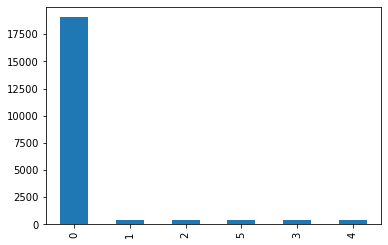

In [33]:
test.fold.value_counts().plot(kind='bar')

In [1]:
test.fold.value_counts()

NameError: name 'test' is not defined

In [3]:
# create some pandas data
from sklearn.datasets import make_classification
import pandas as pd
X, y = make_classification(n_samples = 1000, n_features = 50, n_informative = 10, n_redundant = 40)
X = pd.DataFrame(X)
y = pd.Series(y)

# select top 10 features using mRMR
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=X, y=y, K=10)

100%|██████████| 10/10 [00:00<00:00, 65.67it/s]


In [4]:
selected_features

[11, 48, 21, 43, 7, 46, 22, 4, 3, 1]